In [1]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd

In [2]:

load_dotenv()  

DB_URI = os.getenv("DB_URI")
engine = create_engine(DB_URI)


## Notebook agenda
##### E-commerce teams often track growth using revenue-based metrics. However  Revenue alone ignores logistics returns and customer  incentives. AS a result, businesses can experience apparent growth but silent losses.

##### This notebook evaluates true profitability, not sales volume shifting focus from sales revenue to net economic impact at the order  and customer levels, which gives a clear understanding and saves silent loss.

##### The objective is to surface hidden profitability risks and challenge incentive structures that may be rewarding unprofitable behavior.

In [3]:
#load data 
query = """
SELECT
    SUM(order_revenue) AS total_revenue,
    SUM(order_net_profit) AS total_profit
FROM ecommerce.order_profit;
"""

order_profit= pd.read_sql("SELECT * FROM ecommerce.order_profit;", engine)
order_profit=order_profit[["order_revenue","order_net_profit"]]

order_profit

,order_revenue,order_net_profit
0,58.90,10.270
1,239.90,76.030
2,199.00,61.730
3,12.99,-7.594
4,199.90,61.820
...,...,...
98661,299.99,76.586
98662,350.00,103.470
98663,99.90,23.010
98664,55.99,13.676


In [4]:
print(order_profit.shape)
order_profit.info()

(98666, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_revenue     98666 non-null  float64
 1   order_net_profit  98666 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


In [5]:
order_profit.duplicated().sum()

np.int64(50429)

In [6]:
order_profit.describe()

,order_revenue,order_net_profit
count,98666.000000,98666.000000
mean,137.754076,32.278069
std,210.645145,77.859616
min,0.850000,-1374.960000
25%,45.900000,0.896000
50%,86.900000,14.008000
75%,149.900000,37.120000
max,13440.000000,5151.920000


##### So data is already cleaned cause Most data quality checks were handled during the SQL engineering phase through schema design, constraints, and validated metric views. so we have no need to do it again.

<Axes: title={'center': 'Total Revenue vs Net Profit'}>

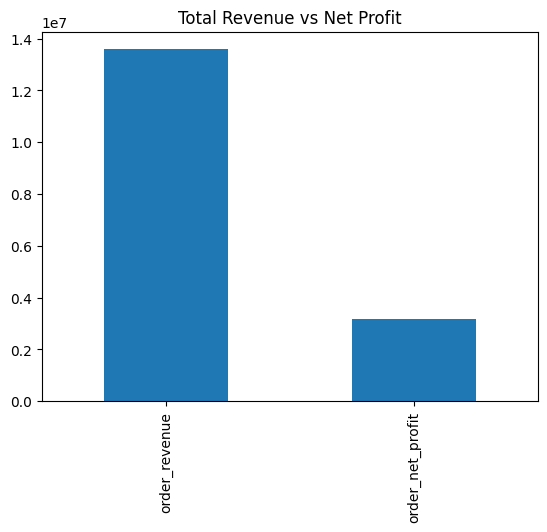

In [7]:
order_profit.sum().plot(
    kind="bar",
    title="Total Revenue vs Net Profit"
)


## Revenue v/s Profit 
##### When we compare total revenue and total profit, we can clearly see the diffrence the profit is so low in comparison to  revenue.
##### This shows that higher revenue does not assure higher profits. A business can appear to grow based on revenue  while still losing money due to hidden costs.
#### so what, 
##### If the company focus only on revenue it may increase sales but reduce overall profitablity.


In [8]:
customers = pd.read_sql(
    "SELECT * FROM ecommerce.customer_profit;",
    engine
)
customers


,customer_unique_id,customer_revenue,customer_cost,customer_freight_value,customer_net_profit,customer_total_order
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,77.940,12.00,39.960,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,11.340,8.29,-0.730,1
2,0000f46a3911fa3c0805444483337064,69.00,41.400,17.22,10.380,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,15.594,17.63,-7.234,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,108.000,16.89,55.110,1
...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,942.000,497.42,130.580,1
95416,fffea47cd6d3cc0a88bd621562a9d061,64.89,38.934,19.69,6.266,1
95417,ffff371b4d645b6ecea244b27531430a,89.90,53.940,22.56,13.400,1
95418,ffff5962728ec6157033ef9805bacc48,115.00,69.000,18.69,27.310,1


In [10]:
customer_sorted_by_revenue = customers.sort_values(
    by="customer_revenue",
    ascending=False
)


In [12]:
top_revenue_customers = customer_sorted_by_revenue.head(15)

top_revenue_customers=top_revenue_customers[
    ["customer_unique_id", "customer_revenue", "customer_net_profit"]
]
top_revenue_customers

,customer_unique_id,customer_revenue,customer_net_profit
3799,0a0a92112bd4c708ca5fde585afaa872,13440.00,5151.920
81388,da122df9eeddfedc1dc1f5349a1a690c,7388.00,2771.570
44139,763c8b1c9c68a0229c42c9fc6f662b93,7160.00,2749.120
82230,dc4802a71eae9be1dd28f5d788ceb526,6735.00,2499.690
26015,459bef486812aa25204be022145caa62,6729.00,2498.390
95131,ff4159b92c40ebe40454e3e6a7c35ed6,6499.00,2371.940
23947,4007669dec559734d6f53e029e360987,5934.60,2226.900
89056,eebb5dda148d3893cdaf5b5ca3040ccb,4690.00,1801.660
34820,5d0a2980b292d049061542014e8960bf,4599.90,1630.420
27242,48e1ac109decbb87765a3eade6854098,4590.00,1744.220


In [13]:
top_losses_customer=customers.sort_values(
    by="customer_net_profit",
).head(15)[
    ["customer_unique_id", "customer_revenue", "customer_net_profit"]
]
top_losses_customer

,customer_unique_id,customer_revenue,customer_net_profit
95407,fff5eb4918b2bf4b2da476788d42051c,1050.00,-1374.960
2397,066ee6b9c6fc284260ff9a1274a82ca7,419.40,-834.530
47313,7e8c7a2149c68d53e1be3b05e3155296,347.97,-235.092
87642,eae0a83d752b1dd32697e0e7b4221656,1821.73,-232.588
33789,5a494c648fde2d1ec4eb614274ea7159,1065.00,-212.380
3754,09ed9b91e77dcb56c1c1e7fdf7fc100c,479.94,-209.604
15172,288fa431def32be70113edf2790985ab,365.70,-187.860
13312,237d81d316c9afc1b1476200408455d8,74.90,-185.470
54981,93a1b58fd7ba6d819a6ee10e56d5d96f,369.00,-177.440
35396,5e9e03fb012cf675d96708ca2f6a0df5,139.98,-176.698


## top_revenue_customers vs top_losses_customer
##### on comaprison top_revenue_customers and top_losses_customer ,its shows revenue alone highlight only top customer profits but its fails for surface level customer who quietly generate losses .
#### so we can say , good revenue alone can not assure prfoit, customer with good revenue is also non-profitabe for company.
#### we have to stop Incentives rewarding system to the wrong customer .

In [14]:
orders = pd.read_sql(
    "SELECT * FROM ecommerce.order_profit;",
    engine
)
orders

,order_id,order_revenue,estimated_cost,freight_value,order_net_profit
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,35.340,13.29,10.270
1,00018f77f2f0320c557190d7a144bdd3,239.90,143.940,19.93,76.030
2,000229ec398224ef6ca0657da4fc703e,199.00,119.400,17.87,61.730
3,00024acbcdf0a6daa1e931b038114c75,12.99,7.794,12.79,-7.594
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,119.940,18.14,61.820
...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,179.994,43.41,76.586
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,210.000,36.53,103.470
98663,fffce4705a9662cd70adb13d4a31832d,99.90,59.940,16.95,23.010
98664,fffe18544ffabc95dfada21779c9644f,55.99,33.594,8.72,13.676


In [15]:
orders["freight_ratio"] = orders["freight_value"] / orders["order_revenue"]
orders

,order_id,order_revenue,estimated_cost,freight_value,order_net_profit,freight_ratio
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,35.340,13.29,10.270,0.225637
1,00018f77f2f0320c557190d7a144bdd3,239.90,143.940,19.93,76.030,0.083076
2,000229ec398224ef6ca0657da4fc703e,199.00,119.400,17.87,61.730,0.089799
3,00024acbcdf0a6daa1e931b038114c75,12.99,7.794,12.79,-7.594,0.984604
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,119.940,18.14,61.820,0.090745
...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,179.994,43.41,76.586,0.144705
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,210.000,36.53,103.470,0.104371
98663,fffce4705a9662cd70adb13d4a31832d,99.90,59.940,16.95,23.010,0.169670
98664,fffe18544ffabc95dfada21779c9644f,55.99,33.594,8.72,13.676,0.155742


In [16]:
high_freight_orders = orders[
    orders["freight_ratio"] > 0.20
].head(15)
high_freight_orders

,order_id,order_revenue,estimated_cost,freight_value,order_net_profit,freight_ratio
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,35.340,13.29,10.270,0.225637
3,00024acbcdf0a6daa1e931b038114c75,12.99,7.794,12.79,-7.594,0.984604
5,00048cc3ae777c65dbb7d2a0634bc1ea,21.90,13.140,12.69,-3.930,0.579452
6,00054e8431b9d7675808bcb819fb4a32,19.90,11.940,11.85,-3.890,0.595477
9,0005f50442cb953dcd1d21e1fb923495,53.99,32.394,11.40,10.196,0.211150
11,00063b381e2406b52ad429470734ebd5,45.00,27.000,12.98,5.020,0.288444
12,0006ec9db01a64e59a68b2c340bf65a7,74.00,44.400,23.32,6.280,0.315135
13,0008288aa423d2a3f00fcb17cd7d8719,99.80,59.880,26.74,13.180,0.267936
14,0009792311464db532ff765bf7b182ae,99.90,59.940,27.65,12.310,0.276777
18,000e562887b1f2006d75e0be9558292e,25.00,15.000,16.11,-6.110,0.644400


In [17]:
high_freight_orders["order_net_profit"].describe()


count    15.000000
mean      4.145600
std       7.832071
min      -7.594000
25%      -3.472000
50%       4.500000
75%      10.233000
max      18.450000
Name: order_net_profit, dtype: float64

In [18]:
low_freight_orders = orders[
    orders["freight_ratio"] <= 0.10
]
low_freight_orders


,order_id,order_revenue,estimated_cost,freight_value,order_net_profit,freight_ratio
1,00018f77f2f0320c557190d7a144bdd3,239.90,143.940,19.93,76.030,0.083076
2,000229ec398224ef6ca0657da4fc703e,199.00,119.400,17.87,61.730,0.089799
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,119.940,18.14,61.820,0.090745
7,000576fe39319847cbb9d288c5617fa6,810.00,486.000,70.75,253.250,0.087346
8,0005a1a1728c9d785b8e2b08b904576c,145.95,87.570,11.65,46.730,0.079822
...,...,...,...,...,...,...
98631,ffea20c7630343a6cd9e09858c1295cd,149.90,89.940,13.34,46.620,0.088993
98641,ffef98cd5ecdc992fefbd967549520dd,139.90,83.940,13.11,42.850,0.093710
98643,ffefb169ddf34cecc0622a6d3cc387f8,129.99,77.994,12.11,39.886,0.093161
98651,fff6b8ca971f8e3ec822e99d0f2d3d21,199.00,119.400,16.83,62.770,0.084573


In [19]:
low_freight_orders["order_net_profit"].describe()


count    15705.000000
mean       127.923753
std        151.254832
min         21.560000
25%         54.316000
50%         79.920000
75%        135.960000
max       5151.920000
Name: order_net_profit, dtype: float64

#### The analysis shows that profit loss is not random and is not caused by customer activity alone. A major driver of reduced profitability is high freight cost, especially for orders with relatively low revenue. In such cases, shipping expenses consume a large portion of the order value, leaving very little or no profit.

In [20]:
order_customer = pd.read_sql(
    "SELECT * FROM ecommerce.order_customer_profit;",
    engine
)
order_customer


,customer_unique_id,customer_id,order_id,freight_value,order_net_profit
0,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,13.29,10.270
1,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,19.93,76.030
2,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,000229ec398224ef6ca0657da4fc703e,17.87,61.730
3,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,00024acbcdf0a6daa1e931b038114c75,12.79,-7.594
4,85c835d128beae5b4ce8602c491bf385,816cbea969fe5b689b39cfc97a506742,00048cc3ae777c65dbb7d2a0634bc1ea,12.69,-3.930
...,...,...,...,...,...
99436,a97fc625e3f3081e1c7385e69dbebf75,1a5c814c2a163354a550737c7c16be75,None,NaN,NaN
99437,1b32669eb9662ee904419de883e59a58,089dc72259b7eb053d3bd3323e2fffb3,None,NaN,NaN
99438,188816aec2d3b009c52e332f96a421d9,470eae0a78a5e9efdbc04378b1c64fea,None,NaN,NaN
99439,882ec00054fec90395323a306ae89f46,1f4eae24bba3f706b3f8db9a4cc8c950,None,NaN,NaN


In [24]:
order_customer_loss = order_customer[order_customer['order_net_profit'] < 0]
order_customer_loss


,customer_unique_id,customer_id,order_id,freight_value,order_net_profit
3,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,00024acbcdf0a6daa1e931b038114c75,12.79,-7.594
4,85c835d128beae5b4ce8602c491bf385,816cbea969fe5b689b39cfc97a506742,00048cc3ae777c65dbb7d2a0634bc1ea,12.69,-3.930
12,3588484a539617d91500764822230fb6,6a3b2fc9f270df258605e22bef19fd88,000e906b789b55f64edcb1f84030f90d,11.85,-3.054
16,8e5a8d9363eb6296154b65750c8702ca,41065d9dcea52218c3943d2eed072b97,0014ae671de39511f7575066200733b7,14.10,-7.500
20,870a0bdc769f9a7870309036740e79ea,d987da9fb4086ab7c2c0f83963cd6722,001d8f0e34a38c37f7dba2a37d4eba8b,15.56,-0.368
...,...,...,...,...,...
98999,7710b4d885fbd08711846e9dc39ec66a,81713b2f519b62832d79a3df8a6814a4,ffae981a027da994061d054aa171c4aa,22.06,-18.060
99001,5d006d94bc156f30b9f21145d0980a0c,de58a2005b3c3a659af894c10d046399,ffb2c3a5bb149a2f860e5d057096201f,91.88,-3.880
99025,9716043346b7e5f149135aca5f2e8c53,6cbf986a2e2aebe93c7f9ec8e598882f,ffd9fe7f21106081de852f98c6c78dca,25.63,-7.630
99028,1906728de43f2d1dcdb09bdd0b834439,60ff2959ab18e70859b8ae136c0bea28,ffdc30c0eaeed2e08818c4dad9806292,15.10,-7.540


In [25]:
duplicate_customers = order_customer_loss[order_customer_loss.duplicated('customer_unique_id', keep=False)]
duplicate_customers

,customer_unique_id,customer_id,order_id,freight_value,order_net_profit
69,d3581765bcf955dcf282b1642c74157c,34417388de13fbcd12cfcbd9d1b8dfbd,0068c109948b9a1dfb8530d1978acef3,31.58,-2.860
249,c2919fbdb45366551c1e80d5cb35cd3f,0523cd19f27a70bda29f2efb68a2db10,014e36af18c280a94d880a16b2f00713,25.38,-1.380
344,5edb5e94dde197f8fd914eec2975b891,99e2b41b1cc2e2779110f22a874e0416,01c79ae32ef95b276907d99e83fe57e5,7.78,-1.020
527,fb8bc250f9f12a9121282d4b0d59485b,947460703c5712189a4e5b5cfff686bc,02b8fcdd1bd75d7d5861f407dde29768,22.85,-17.254
660,f8bc1d81f395f6239a2a5ab1b9edf1ab,b49786f49847d2fecf5ba2d455321642,0362e923f805ae4dce58fd78c86c96c4,142.92,-74.620
...,...,...,...,...,...
98518,63cfc61cee11cbe306bff5857d00bfe4,a2922aea328704a90286d7b51b05b633,fd1c3bee1ee3b10e9f65bd92b3ebba38,45.19,-3.602
98521,ff922bdd6bafcdf99cb90d7f39cea5b3,1ae563fdfa500d150be6578066d83998,fd216c435fda2be27c92920a5e5dba82,14.52,-4.560
98581,118be57d1b7de439453a0c6625ad7934,1a84d26e0b91518f76c51b59bb3e9408,fd732412d4727a9a7e0d6231b2ca11ed,15.79,-3.830
98689,4ad4d9be004941fb8e0ffd31ddbf1f3c,437dcc2bd3f47c77e640b63a067d408a,fe05c6dcaf512456a03860df06cc034c,19.45,-4.690


In [26]:
bad_customer_summary = order_customer_loss.groupby('customer_unique_id').agg({
    'order_id': 'count',
    'order_net_profit': 'sum',
    'freight_value': 'mean'
}).rename(columns={'order_id': 'total_bad_orders', 'order_net_profit': 'lifetime_loss'})

repeat_losers = bad_customer_summary[bad_customer_summary['total_bad_orders'] > 1]
repeat_losers


,total_bad_orders,lifetime_loss,freight_value
customer_unique_id,,,
004b45ec5c64187465168251cd1c9c2f,2,-26.060,30.410000
01886ef98f995e4f2dd75a1d04c97397,2,-17.546,17.025000
01c289bb06354cdc7e6549570f20ada4,2,-46.528,51.260000
0241fa2e9adf0576cb0f845377d05c03,2,-13.796,33.360000
027803eb28cc01fbdf5da72b109fabee,2,-10.444,18.220000
...,...,...,...
fd8ccc89be43894d2553494c71a61fd8,2,-8.754,21.065000
fe3e52de024b82706717c38c8e183084,2,-4.840,24.200000
fed2005ccab4fcf1a40ebdaff032a148,2,-16.232,20.240000


#### anaylsis-> By aggregating loss-making orders at the customer level, we observe that several customers generate losses across multiple orders rather than as isolated incidents. This indicates that loss-making behavior is repeated over time. The absence of corrective signals suggests that current incentive and shipping policies do not discourage unprofitable ordering patterns

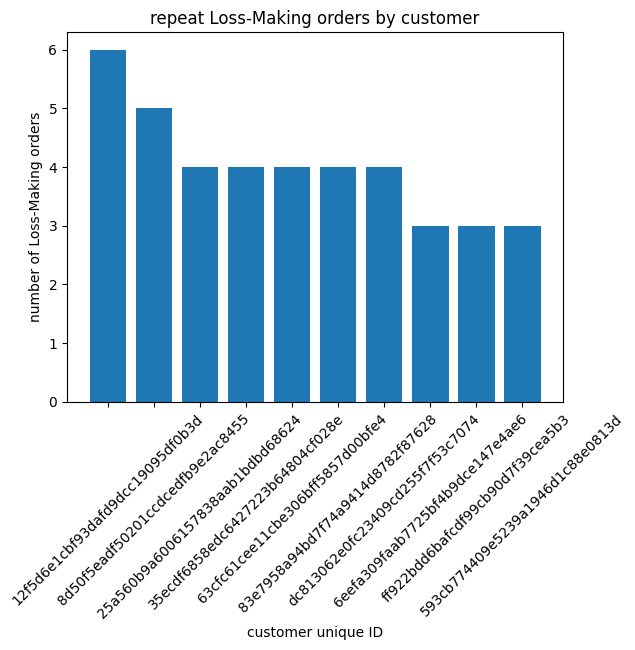

In [27]:
import matplotlib.pyplot as plt

# Take top 10 repeat loss-making customers
top_repeat_losers = repeat_losers.sort_values(
    by="total_bad_orders",
    ascending=False
).head(10)
plt.bar(
    top_repeat_losers.index.astype(str),
    top_repeat_losers["total_bad_orders"]
)
plt.xticks(rotation=45)
plt.title("repeat Loss-Making orders by customer")
plt.xlabel("customer unique ID")
plt.ylabel("number of Loss-Making orders")
plt.show()


##### The chart shows that several customers generate losses across multiple orders rather than as isolated incidents. This confirms that loss-making behavior is repeated over time. The absence of corrective signals indicates that current incentive and shipping policies do not discourage unprofitable ordering patterns.
### The system is training customers to be unprofitable — and then rewarding them.

In [28]:
total_customers = order_customer["customer_unique_id"].nunique()

loss_customers = order_customer_loss["customer_unique_id"].nunique()

pct_loss_customers = (loss_customers / total_customers) * 100
total_customers, loss_customers, pct_loss_customers


(96096, 22224, 23.126873126873125)

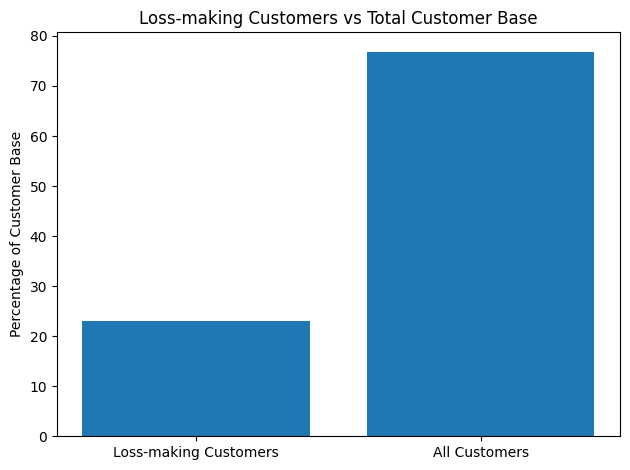

In [29]:
labels = ["Loss-making Customers", "All Customers"]
values = [pct_loss_customers, 100 - pct_loss_customers]

plt.figure()
plt.bar(labels, values)
plt.ylabel("Percentage of Customer Base")
plt.title("Loss-making Customers vs Total Customer Base")
plt.tight_layout()
plt.show()


In [30]:
total_orders = orders["order_id"].nunique()

loss_orders = order_customer_loss["order_id"].nunique()

pct_loss_orders = (loss_orders / total_orders) * 100
total_orders, loss_orders, pct_loss_orders


(98666, 22639, 22.945087466807205)

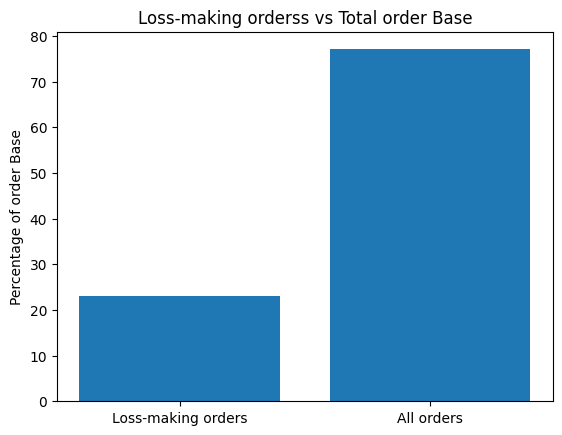

In [31]:
labels = ["Loss-making orders", "All orders"]
values = [pct_loss_orders, 100 - pct_loss_orders]

plt.bar(labels, values)
plt.ylabel("Percentage of order Base")
plt.title("Loss-making orderss vs Total order Base")
plt.show()


#### Although repeat loss-making customers represent a small fraction of the customer base, they contribute disproportionately to overall business losses. These customers place a meaningful share of total orders while consistently destroying profit. This confirms that profitability risk is highly concentrated and that targeted interventions would be more effective than blanket policies